# Final Project

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the training data
PATH = '/content/drive/My Drive/Colab Notebooks/'
train_df = pd.read_csv(PATH+'train.csv')

# Show basic info and first few rows
train_info = train_df.info()
train_head = train_df.head()

train_info, train_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


(None,
    id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
 0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
 1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
 2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
 3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
 4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   
 
    cloud  sunshine  winddirection  windspeed  rainfall  
 0   88.0       1.1           60.0       17.2         1  
 1   91.0       0.0           50.0       21.9         1  
 2   47.0       8.3           70.0       18.1         1  
 3   95.0       0.0           60.0       35.6         1  
 4   45.0       3.6           40.0       24.8         0  )

In [ ]:
#Logistic Regression Model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
X = train_df.drop(columns=['id', 'rainfall'])
y = train_df['rainfall']

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8538812785388128

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70       119
           1       0.87      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.78      0.80       438
weighted avg       0.85      0.85      0.85       438



Validation Accuracy: 0.8242009132420092

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       119
           1       0.87      0.90      0.88       319

    accuracy                           0.82       438
   macro avg       0.78      0.76      0.77       438
weighted avg       0.82      0.82      0.82       438



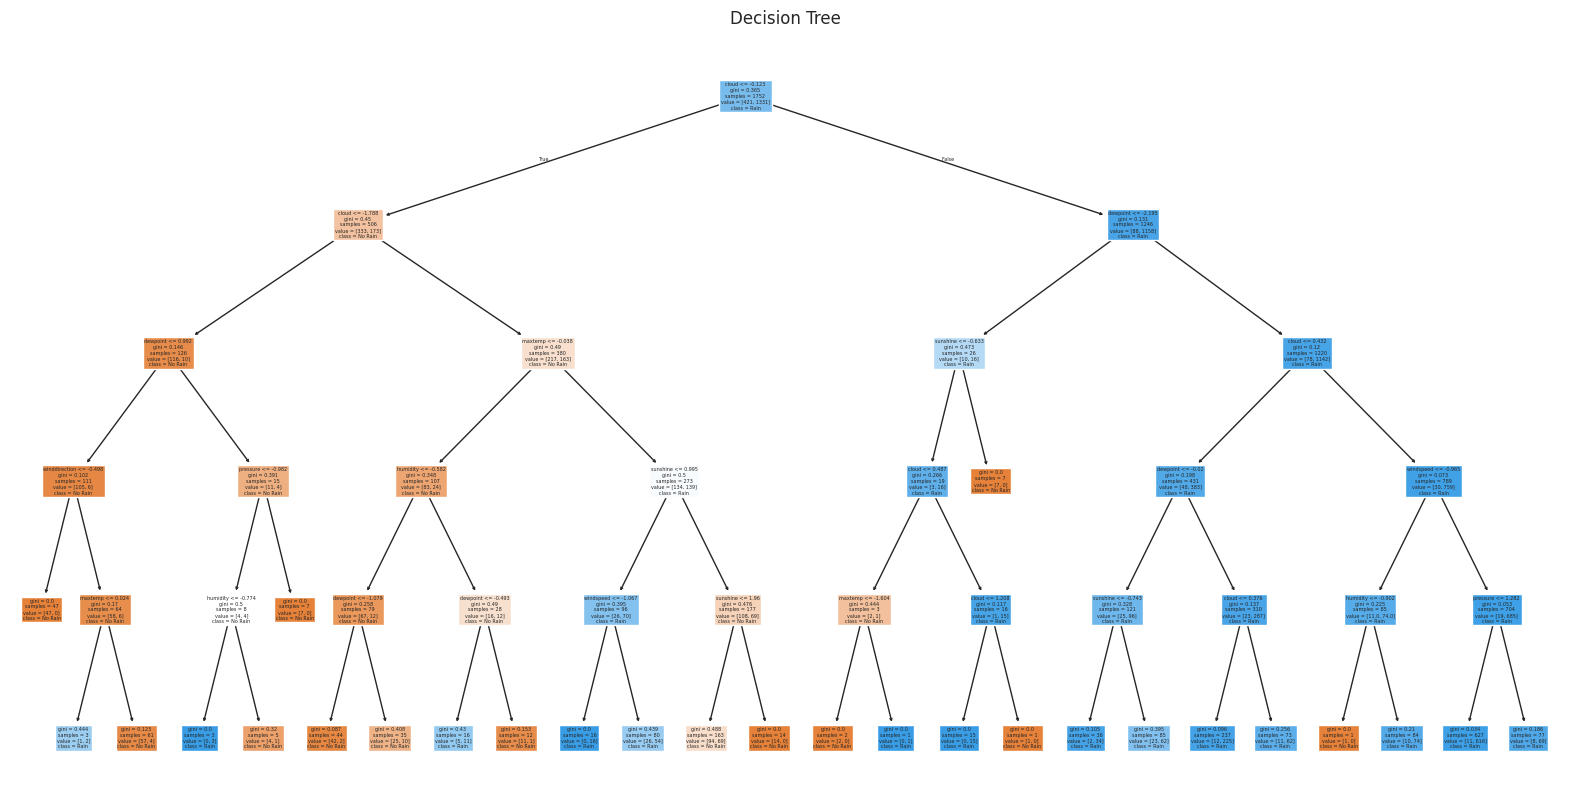

In [ ]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Step 8: Evaluate model
y_pred = tree_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Step 9: Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['No Rain', 'Rain'], filled=True)
plt.title("Decision Tree")
plt.show()

Validation Accuracy: 0.8515981735159818

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.60      0.69       119
           1       0.86      0.95      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.77      0.79       438
weighted avg       0.85      0.85      0.84       438



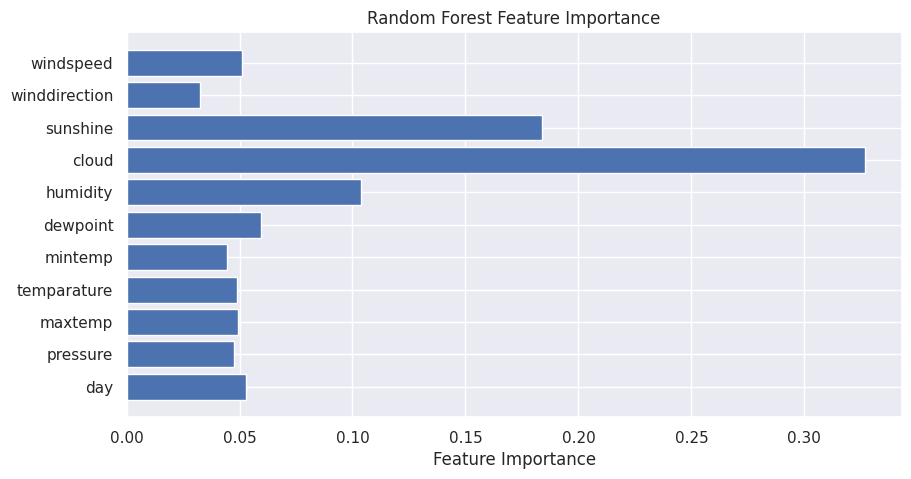

In [ ]:
# Decision Forest
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
forest_model.fit(X_train, y_train)

# Evaluate on validation data
y_pred = forest_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Feature Importance Visualization
importances = forest_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
# CNN
# Define window size (3 = [previous, current, next])
window_size = 8

# Convert X and y into sequential windows
def create_sequences(X, y, window_size):
    X_seq = []
    y_seq = []
    for i in range(len(X) - window_size + 1):
        X_seq.append(X[i : i + window_size])   # exactly 8 days
        y_seq.append(y[i + window_size-1])   # use label for last day in window
    return np.array(X_seq), np.array(y_seq)

# Apply to full data
X_seq, y_seq = create_sequences(X.values, y.values, window_size=window_size)

# Train-validation split again
from sklearn.model_selection import train_test_split
X_train_seq, X_val_seq, y_train_seq, y_val_seq = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42
)

In [ ]:
print(X_seq[0])
print("X_seq shape:", X_seq.shape)

[[1.0000e+00 1.0174e+03 2.1200e+01 2.0600e+01 1.9900e+01 1.9400e+01
  8.7000e+01 8.8000e+01 1.1000e+00 6.0000e+01 1.7200e+01]
 [2.0000e+00 1.0195e+03 1.6200e+01 1.6900e+01 1.5800e+01 1.5400e+01
  9.5000e+01 9.1000e+01 0.0000e+00 5.0000e+01 2.1900e+01]
 [3.0000e+00 1.0241e+03 1.9400e+01 1.6100e+01 1.4600e+01 9.3000e+00
  7.5000e+01 4.7000e+01 8.3000e+00 7.0000e+01 1.8100e+01]
 [4.0000e+00 1.0134e+03 1.8100e+01 1.7800e+01 1.6900e+01 1.6800e+01
  9.5000e+01 9.5000e+01 0.0000e+00 6.0000e+01 3.5600e+01]
 [5.0000e+00 1.0218e+03 2.1300e+01 1.8400e+01 1.5200e+01 9.6000e+00
  5.2000e+01 4.5000e+01 3.6000e+00 4.0000e+01 2.4800e+01]
 [6.0000e+00 1.0227e+03 2.0600e+01 1.8600e+01 1.6500e+01 1.2500e+01
  7.9000e+01 8.1000e+01 0.0000e+00 2.0000e+01 1.5700e+01]
 [7.0000e+00 1.0228e+03 1.9500e+01 1.8400e+01 1.5300e+01 1.1300e+01
  5.6000e+01 4.6000e+01 7.6000e+00 2.0000e+01 2.8400e+01]
 [8.0000e+00 1.0197e+03 1.5800e+01 1.3600e+01 1.2700e+01 1.1800e+01
  9.6000e+01 1.0000e+02 0.0000e+00 5.0000e+01 5.28

In [ ]:
y_seq

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()

# Reshape input for Conv2D: (samples, height, width, channels)
X_train_2d = X_train_seq.reshape(-1, window_size, X.shape[1], 1)
X_val_2d = X_val_seq.reshape(-1, window_size, X.shape[1], 1)

# Build Conv2D model
tf.keras.backend.clear_session()
model_tf = tf.keras.Sequential()

# Add convolutional layer
model_tf.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(4, 4),
    strides=(1, 1),
    padding='same',
    data_format='channels_last',
    activation='relu',
    name='conv_1',
    input_shape=(window_size, X.shape[1], 1)  # (height, width, channels)
))

# Add max pooling layer
model_tf.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
model_tf.add(tf.keras.layers.Dropout(rate=0.3))

# Add flattening layer
model_tf.add(tf.keras.layers.Flatten())

# Add classification layer
model_tf.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile model
model_tf.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

# Print summary
model_tf.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                      │ (None, 8, 11, 32)           │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 4, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             641 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3843 - loss: 52.7826 - val_accuracy: 0.7346 - val_loss: 12.9591
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6405 - loss: 23.0251 - val_accuracy: 0.7346 - val_loss: 11.9836
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6186 - loss: 20.2140 - val_accuracy: 0.7346 - val_loss: 11.9028
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6271 - loss: 19.3594 - val_accuracy: 0.7346 - val_loss: 12.4062
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6116 - loss: 21.6242 - val_accuracy: 0.7346 - val_loss: 10.0647
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6488 - loss: 17.0239 - val_accuracy: 0.7346 - val_loss: 8.7785
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6069 - loss: 18.1099 - val_accuracy: 0.7346 - val_loss: 9.6552
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6172 - loss: 17.0471 - val_accura

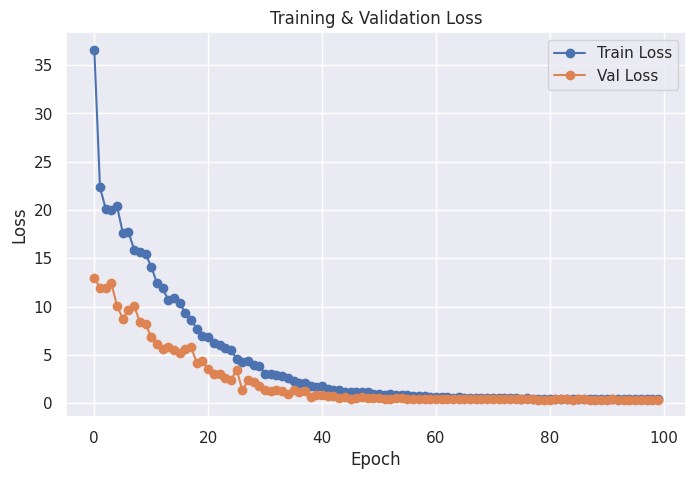

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8531 - loss: 0.3572
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8555 - loss: 0.3823 
Training Accuracy: 0.8505
Validation Accuracy: 0.8535


In [ ]:
import matplotlib.pyplot as plt

history = model_tf.fit(
    X_train_2d, y_train_seq,
    validation_data=(X_val_2d, y_val_seq),
    epochs=100,
    batch_size=32
)

# Plot losses
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# Evaluate
train_loss, train_acc = model_tf.evaluate(X_train_2d, y_train_seq)
val_loss, val_acc = model_tf.evaluate(X_val_2d, y_val_seq)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()

# Reshape input for Conv2D: (samples, height, width, channels)
X_train_2d = X_train_seq.reshape(-1, window_size, X.shape[1], 1)
X_val_2d = X_val_seq.reshape(-1, window_size, X.shape[1], 1)

# Build Conv2D model
tf.keras.backend.clear_session()
model_tf = tf.keras.Sequential()

# Add convolutional layer
model_tf.add(tf.keras.layers.Conv2D(
    filters=256,
    kernel_size=(4, 5),
    strides=(1, 1),
    padding='same',
    data_format='channels_last',
    activation='relu',
    name='conv_1',
    input_shape=(window_size, X.shape[1], 1)  # (height, width, channels)
))

# Add max pooling layer
model_tf.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
model_tf.add(tf.keras.layers.Dropout(rate=0.1))

model_tf.add(tf.keras.layers.Conv2D(
    filters=160,
    kernel_size=(2, 4),
    strides=(1, 1),
    padding='same',
    data_format='channels_last',
    activation='relu',
    name='conv_2')  # (height, width, channels)
)

# Add max pooling layer
model_tf.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
model_tf.add(tf.keras.layers.Dropout(rate=0.4))

# Add flattening layer
model_tf.add(tf.keras.layers.Flatten())

# Add classification layer
model_tf.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile model
model_tf.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

# Print summary
model_tf.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                      │ (None, 8, 11, 256)          │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 4, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, 4, 5, 160)           │         327,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 160)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 160)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             641 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,857 (1.27 MB)

 Trainable params: 333,857 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5995 - loss: 47.7925 - val_accuracy: 0.7346 - val_loss: 0.6767
Epoch 2/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6341 - loss: 2.9968 - val_accuracy: 0.7368 - val_loss: 0.5043
Epoch 3/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6968 - loss: 0.7673 - val_accuracy: 0.7368 - val_loss: 0.5154
Epoch 4/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7469 - loss: 0.5673 - val_accuracy: 0.7643 - val_loss: 0.4740
Epoch 5/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7824 - loss: 0.5014 - val_accuracy: 0.7963 - val_loss: 0.4542
Epoch 6/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8030 - loss: 0.4598 - val_accuracy: 0.7986 - val_loss: 0.4363
Epoch 7/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8125 - loss: 0.4337 - val_accuracy: 0.8284 - val_loss: 0.4133
Epoch 8/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8150 - loss: 0.4430 - val_accuracy: 0.8101 - val_los

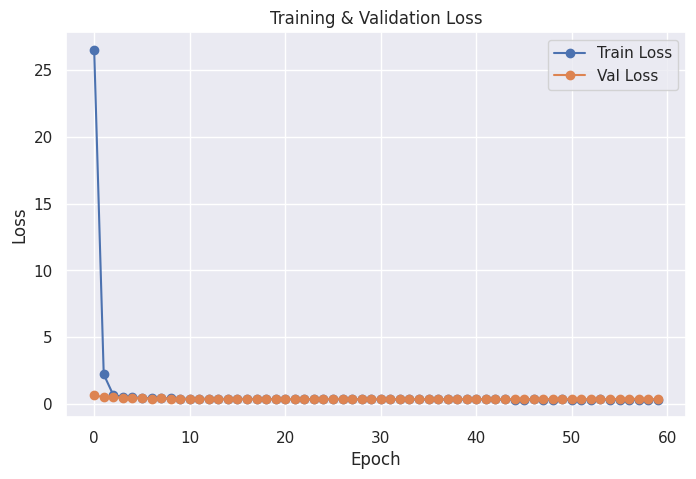

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8844 - loss: 0.2964
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8655 - loss: 0.3721
Training Accuracy: 0.8803
Validation Accuracy: 0.8604


In [ ]:
import matplotlib.pyplot as plt
# Fit the model
history = model_tf.fit(
    X_train_2d, y_train_seq,
    validation_data=(X_val_2d, y_val_seq),
    epochs=60,
    batch_size=64
)
# Plot losses
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# Evaluate
train_loss, train_acc = model_tf.evaluate(X_train_2d, y_train_seq)
val_loss, val_acc = model_tf.evaluate(X_val_2d, y_val_seq)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


### Best models
- filters_1: 256
kernel_height_1: 5
kernel_width_1: 6
dropout_1: 0.3
filters_2: 128
kernel_height_2: 3
kernel_width_2: 5
dropout_2: 0.3
lr: 0.001
- filters_1: 192
kernel_height_1: 4
kernel_width_1: 7
dropout_1: 0.2
filters_2: 160
kernel_height_2: 2
kernel_width_2: 4
dropout_2: 0.2
lr: 0.0005
- filters_1: 256
kernel_height_1: 4
kernel_width_1: 7
dropout_1: 0.2
filters_2: 160
kernel_height_2: 2
kernel_width_2: 6
dropout_2: 0.3
lr: 0.001
- filters_1: 256
kernel_height_1: 4
kernel_width_1: 8
dropout_1: 0.1
filters_2: 160
kernel_height_2: 2
kernel_width_2: 4
dropout_2: 0.4
lr: 0.001